In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images.shape
train_images

train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)


predictions = model.predict(test_images)
np.argmax(predictions[0])


4423680/4422102 [==============================] - 6s 1us/step
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4950 - accuracy: 0.8252
Epoch 2/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3705 - accuracy: 0.8675
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3327 - accuracy: 0.8798
Epoch 4/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3107 - accuracy: 0.8869
Epoch 5/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2938 - accuracy: 0.8915


9

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 97us/sample - loss: 2.3477 - accuracy: 0.1385 - val_loss: 2.1054 - val_accuracy: 0.2490
Epoch 2/3
60000/60000 [==============================] - 5s 86us/sample - loss: 2.0976 - accuracy: 0.2335 - val_loss: 1.9064 - val_accuracy: 0.4584
Epoch 3/3
60000/60000 [==============================] - 5s 86us/sample - loss: 1.9187 - accuracy: 0.3307 - val_loss: 1.7486 - val_accuracy: 0.5511


KeyError: 'acc'

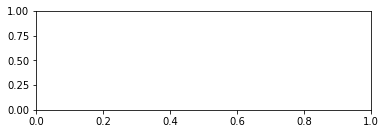

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adadelta(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_log = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

model_log.history

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig


In [ ]:
import tensorflow as tf
from tensorflow import keras as ks

(train_images, train_labels), (test_images, test_labels) = ks.datasets.fashion_mnist.load_data()

x_train = train_images.reshape(train_images.shape[0], 28, 28, 1)
x_test = test_images.reshape(test_images.shape[0], 28, 28, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = ks.utils.to_categorical(train_labels, 10)
y_test = ks.utils.to_categorical(test_labels, 10)

input_shape = (28,28,1)

model = ks.Sequential()
model.add(ks.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(ks.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(ks.layers.Dropout(0.25))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(128, activation='relu'))
model.add(ks.layers.Dropout(0.5))                     
model.add(ks.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss=ks.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=3,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
score